In [2]:
import os, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
dataset = pd.read_csv("zech336_scdna-energy-threading_start-n084_dataset", index_col=0)
df = dataset[["state","scdna","forcefield","sum","seq_position"]]
del dataset

In [4]:
for state in df.state.unique():
    for model in df.forcefield.unique():
        testdf = df.copy().loc[(df.state==state)&(df.forcefield==model)].reset_index(drop=True)
        testdf = testdf[(testdf.seq_position!=0)&(testdf.seq_position!=336)]
        print(model, 
              state, 
              testdf.at[testdf['sum'].idxmin(),'seq_position'],
              testdf['sum'].min())
        del testdf

young2022-dim st26 262 448.0647471712696
IdealDNA st26 1 58.04772586242132
young2022-tet st26 327 673.915521272806
young2022-dim st27 115 433.9511296696555
IdealDNA st27 1 68.59815892784384
young2022-tet st27 327 730.6320885840687
young2022-dim st28 262 449.2465492921768
IdealDNA st28 1 58.04770868272973
young2022-tet st28 327 684.4907440585567
young2022-dim st29 115 433.950917576816
IdealDNA st29 1 45.92227547224471
young2022-tet st29 115 731.3410783371774
young2022-dim st30 262 404.9052973618299
IdealDNA st30 1 33.80976041859535
young2022-tet st30 327 673.916687364489
young2022-dim st31 262 371.8186647888536
IdealDNA st31 1 19.749997796417507
young2022-tet st31 327 637.0056901934663
young2022-dim st32 262 390.1442313611144
IdealDNA st32 1 8.240143378374183
young2022-tet st32 327 644.6460561235303
young2022-dim st33 312 458.9399592658935
IdealDNA st33 1 19.750593312658093
young2022-tet st33 304 710.0031045916909
young2022-dim st34 326 489.7236166670477
IdealDNA st34 1 33.8100915638444

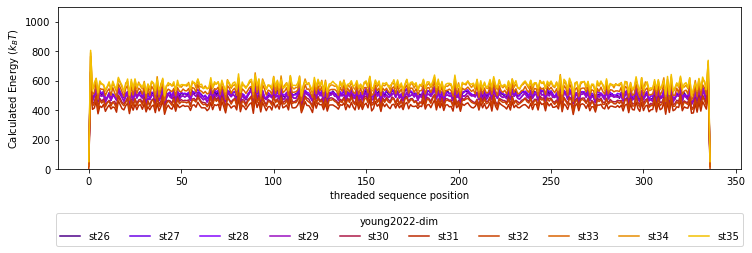

<Figure size 432x288 with 0 Axes>

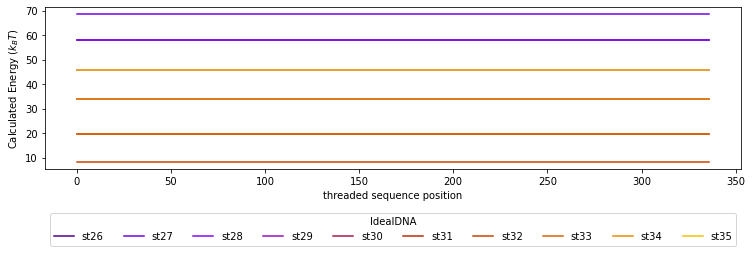

<Figure size 432x288 with 0 Axes>

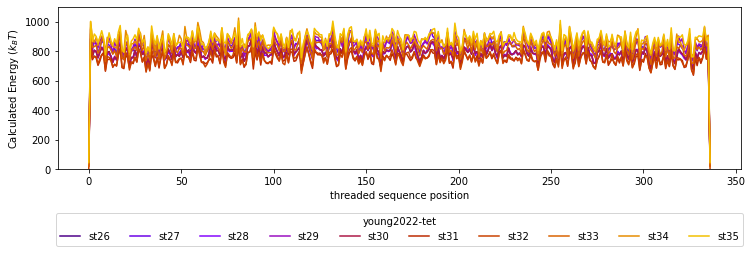

<Figure size 432x288 with 0 Axes>

In [5]:
for model in df.forcefield.unique():
    
    fig, ax = plt.subplots(1, 1, figsize=(11,4))
    
    pltdf = df.copy().loc[df.forcefield==model]
    sns.lineplot(data=pltdf,
                 x="seq_position",
                 y="sum",
                 hue="state",
                 palette="gnuplot",
                 ax=ax)
    sns.move_legend(ax, "lower center", title=model, ncol=10, bbox_to_anchor=(0.5, -0.5))
    if "young2022" in model:
        ax.set_ylim(0, 1100)
    #ax.set_xlim(0, 336)
    ax.set(xlabel="threaded sequence position", ylabel="Calculated Energy ($k_{B}T$)")
    del pltdf
    plt.tight_layout()
    plt.savefig("zech-thread_scdna-energy_"+model+"_v02.png", dpi=300)
    plt.show()
    plt.clf()

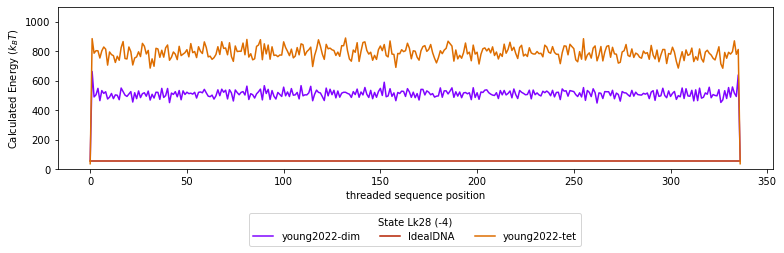

<Figure size 432x288 with 0 Axes>

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(11,4))

pltdf = df.copy().loc[(df.state=="st28")]

sns.lineplot(data=pltdf,
             x="seq_position",
             y="sum",
             hue="forcefield",
             palette="gnuplot",
             ax=ax)

sns.move_legend(ax, "lower center", title="State Lk28 (-4)", ncol=3, bbox_to_anchor=(0.5, -0.5))
if "young2022" in model:
    ax.set_ylim(0, 1100)
#ax.set_xlim(0, 336)
ax.set(xlabel="threaded sequence position", ylabel="Calculated Energy ($k_{B}T$)")
del pltdf
plt.tight_layout()
plt.savefig("zech-thread_scdna-energy_st28-only_v01.png", dpi=300)
plt.show()
plt.clf()

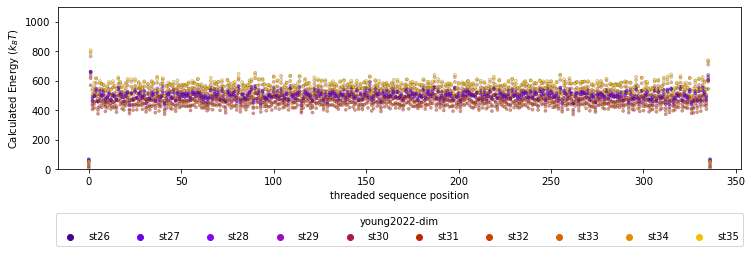

<Figure size 432x288 with 0 Axes>

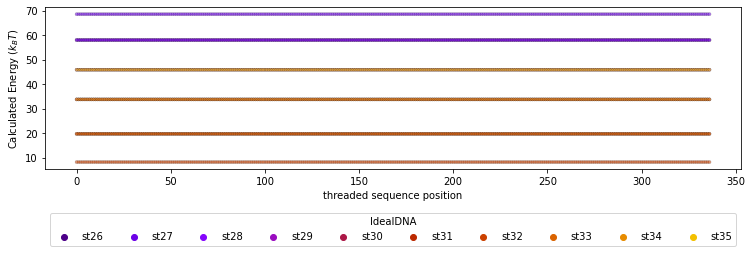

<Figure size 432x288 with 0 Axes>

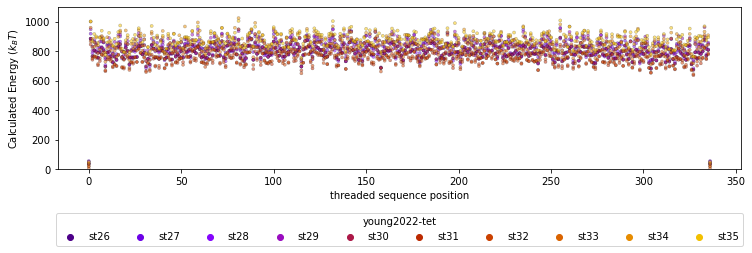

<Figure size 432x288 with 0 Axes>

In [7]:
for model in df.forcefield.unique():
    
    fig, ax = plt.subplots(1, 1, figsize=(11,4))
    
    pltdf = df.copy().loc[df.forcefield==model]
    sns.scatterplot(data=pltdf,
                    x="seq_position", y="sum", hue="state", 
                    alpha=0.50, palette="gnuplot", s=10, edgecolor='black',
                    ax=ax)
    
    sns.move_legend(ax, "lower center", title=model, ncol=10, bbox_to_anchor=(0.5, -0.5))
    if "young2022" in model:
        ax.set_ylim(0, 1100)
    #ax.set_xlim(0, 336)
    ax.set(xlabel="threaded sequence position", ylabel="Calculated Energy ($k_{B}T$)")
    del pltdf
    plt.tight_layout()
    plt.savefig("zech-thread_scdna-energy_"+model+"_v02.png", dpi=300)
    plt.show()
    plt.clf()